##Part I

In [2]:
import pandas as pd
#importing dataset
X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/20200518_CRL/CRL (1).csv')
X

,Unnamed: 0,gamemode,battletime,p1.name,p2.name,p1.crowns,p2.crowns,p1.card_1,p1.card_2,p1.card_3,p1.card_4,p1.card_5,p1.card_6,p1.card_7,p1.card_8,p2.card_1,p2.card_2,p2.card_3,p2.card_4,p2.card_5,p2.card_6,p2.card_7,p2.card_8
0,0,Ladder,20200514T220554.000Z,lemonTree68,薛家军.渣男1号,0,3,Archers,Skeletons,Tesla,Fireball,Ice Spirit,Ice Golem,X-Bow,The Log,Elixir Golem,Inferno Dragon,Arrows,Night Witch,Electro Dragon,Heal Spirit,Rage,Battle Healer
1,1,Ladder,20200514T212938.000Z,lemonTree68,Kendaswagger ツ,0,1,Archers,Skeletons,Tesla,Fireball,Ice Spirit,Ice Golem,X-Bow,The Log,Knight,Bats,Spear Goblins,Wall Breakers,Poison,The Log,Miner,Bomb Tower
2,2,Ladder,20200514T184213.000Z,lemonTree68,Dj Alexis ♡,1,0,Archers,Skeletons,Tesla,Fireball,Ice Spirit,Ice Golem,X-Bow,The Log,Ice Wizard,Inferno Dragon,Skeleton Army,Balloon,Royal Hogs,Arrows,Zap,Barbarians
3,3,Ladder,20200514T181711.000Z,lemonTree68,mike1m1ke,0,1,Archers,Skeletons,Tesla,Fireball,Ice Spirit,Ice Golem,X-Bow,The Log,X-Bow,Tesla,The Log,Fireball,Archers,Ice Golem,Ice Spirit,Skeletons
4,4,Ladder,20200514T181114.000Z,lemonTree68,Kat,1,0,Archers,Skeletons,Tesla,Fireball,Ice Spirit,Ice Golem,X-Bow,The Log,P.E.K.K.A,Poison,Royal Ghost,Battle Ram,Magic Archer,Zap,Bandit,Electro Wizard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,20,Ladder,20200515T235322.000Z,Carl the Legend,⚡Kamikaze⚡,0,1,Lava Hound,Balloon,Zap,Minions,Barbarians,Mega Minion,Fireball,Tombstone,Giant,Prince,Dark Prince,Mega Minion,Fireball,Miner,Electro Wizard,Zap
660,21,Ladder,20200515T234741.000Z,Carl the Legend,MB CHILE,2,1,Lava Hound,Balloon,Zap,Minions,Barbarians,Mega Minion,Fireball,Tombstone,Miner,Bats,The Log,Ice Golem,Wall Breakers,Bomb Tower,Poison,Spear Goblins
661,22,Ladder,20200515T233545.000Z,Carl the Legend,❤️Bopi❤️,2,1,Lava Hound,Balloon,Zap,Minions,Barbarians,Mega Minion,Fireball,Tombstone,Knight,Spear Goblins,Bats,Wall Breakers,Miner,Bomb Tower,Zap,The Log
662,23,Ladder,20200515T232652.000Z,Carl the Legend,Tilt_Master❤,2,1,Lava Hound,Balloon,Zap,Minions,Barbarians,Mega Minion,Fireball,Tombstone,Golem,Barbarian Barrel,Baby Dragon,Lightning,Tornado,Night Witch,Lumberjack,Mega Minion


In [3]:
#only selecting the decks of player n.2
X = X[['p2.card_1', 'p2.card_2', 'p2.card_3', 'p2.card_4', 'p2.card_5', 'p2.card_6', 'p2.card_7', 'p2.card_8']]
X

,p2.card_1,p2.card_2,p2.card_3,p2.card_4,p2.card_5,p2.card_6,p2.card_7,p2.card_8
0,Elixir Golem,Inferno Dragon,Arrows,Night Witch,Electro Dragon,Heal Spirit,Rage,Battle Healer
1,Knight,Bats,Spear Goblins,Wall Breakers,Poison,The Log,Miner,Bomb Tower
2,Ice Wizard,Inferno Dragon,Skeleton Army,Balloon,Royal Hogs,Arrows,Zap,Barbarians
3,X-Bow,Tesla,The Log,Fireball,Archers,Ice Golem,Ice Spirit,Skeletons
4,P.E.K.K.A,Poison,Royal Ghost,Battle Ram,Magic Archer,Zap,Bandit,Electro Wizard
...,...,...,...,...,...,...,...,...
659,Giant,Prince,Dark Prince,Mega Minion,Fireball,Miner,Electro Wizard,Zap
660,Miner,Bats,The Log,Ice Golem,Wall Breakers,Bomb Tower,Poison,Spear Goblins
661,Knight,Spear Goblins,Bats,Wall Breakers,Miner,Bomb Tower,Zap,The Log
662,Golem,Barbarian Barrel,Baby Dragon,Lightning,Tornado,Night Witch,Lumberjack,Mega Minion


In [0]:
#https://docs.google.com/spreadsheets/d/1wIH69gfuCCoPRoWOIyUqQHMKkUfpb4GAxUbBYX8PwRc/edit#gid=1477229539
C = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/20200518_CRL/CRL_Cards_Classification.csv')
cards_classifier = C.copy()
cards_classifier.pop('Type_1')
cards_classifier = cards_classifier.values.transpose()
cards_classifier

def order_row(list1):
  #mappiamo lista input di carte al tipo
  card_dictionary = dict(zip(cards_classifier[0], cards_classifier[1]))
  card_dictionary

  list_tot_classification = list()
  for m in list1:
    a = card_dictionary.get(m)
    list_tot_classification.append(a)

  list_tot_classification
  #['Spell', 'Troop', 'Troop', 'Win Condition', 'Spell', 'Troop', 'Troop', 'Troop']

  class_dict = {'Win Condition': 0, 'Troop': 1, 'Building': 2, 'Spell': 3}

  #sorted by win condition, Troop, Building then Spell
  list_tot_num = list()
  for m in list_tot_classification:
    a = class_dict.get(m)
    list_tot_num.append(a)
  
  ordered_list = [x for _,x in sorted(zip(list_tot_num, list1))]
  return ordered_list

#example
#list1 = ['Arrows',	'Baby Dragon',	'Bomber', 'Golem',	'Lightning',	'Mega Minion',	'Mini P.E.K.K.A',	'Night Witch', 'Cannon']
#ordered_list = order_row(list1)
#ordered_list

In [5]:
#sort each row based on the format: Win Condition, Troop, Building, Spell
for c in range(len(X.values)):
  X.values[c] = order_row(X.values[c])
  #X.values[c] = sorted(X.values[c])
X = pd.DataFrame(X.values)
X

,0,1,2,3,4,5,6,7
0,Elixir Golem,Battle Healer,Electro Dragon,Inferno Dragon,Night Witch,Arrows,Heal Spirit,Rage
1,Miner,Bats,Knight,Spear Goblins,Wall Breakers,Bomb Tower,Poison,The Log
2,Balloon,Royal Hogs,Barbarians,Ice Wizard,Inferno Dragon,Skeleton Army,Arrows,Zap
3,X-Bow,Archers,Ice Golem,Ice Spirit,Skeletons,Tesla,Fireball,The Log
4,Battle Ram,P.E.K.K.A,Bandit,Electro Wizard,Magic Archer,Royal Ghost,Poison,Zap
...,...,...,...,...,...,...,...,...
659,Giant,Miner,Dark Prince,Electro Wizard,Mega Minion,Prince,Fireball,Zap
660,Miner,Bats,Ice Golem,Spear Goblins,Wall Breakers,Bomb Tower,Poison,The Log
661,Miner,Bats,Knight,Spear Goblins,Wall Breakers,Bomb Tower,The Log,Zap
662,Golem,Baby Dragon,Lumberjack,Mega Minion,Night Witch,Barbarian Barrel,Lightning,Tornado


In [6]:
#flat everything in one list
one_row = list()
for k in X.values:
  for n in k:
    one_row.append(n)
one_row = pd.DataFrame(one_row)
one_row

#labeled list
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(one_row[0])
one_row_labeled = le.transform(one_row[0])
one_row_labeled

#rebuild the original dataset and convert it to DataFrame
import numpy
X_labeled = numpy.array_split(one_row_labeled, (len(one_row)/8))
X_labeled = pd.DataFrame(X_labeled)
X_labeled

,0,1,2,3,4,5,6,7
0,24,9,20,51,67,1,45,72
1,60,8,53,84,91,11,69,86
2,3,79,7,50,51,80,1,94
3,93,0,48,49,82,85,27,86
4,10,68,4,21,57,77,69,94
...,...,...,...,...,...,...,...,...
659,33,60,17,21,59,70,27,94
660,60,8,48,84,91,11,69,86
661,60,8,53,84,91,11,86,94
662,42,2,56,59,67,5,55,89


##Part II

In [7]:
print(max(one_row_labeled+1), len(X_labeled))

95 664


In [33]:
#one_hot of multiple columns at the same time:
#create an empty dataset of equal lenght of max. label (94), but equal width of our X (664)
m = [[0 for x in range(max(one_row_labeled)+1)] for x in range(len(X_labeled))]

#turn each corresponding label to 1
for row in range(len(X_labeled.values)):
  for num in range(len(X_labeled.values[1])):
    m[row][X_labeled.values[row][num]] = 1
m = pd.DataFrame(m)
m

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
660,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
661,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
662,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


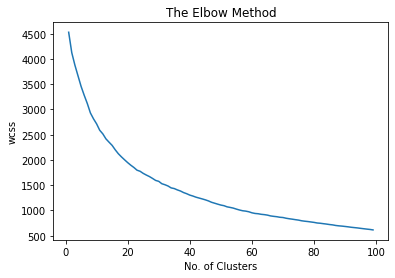

In [9]:
#graph the number of clusters
#utilizzando kmeans forse non è valido per questo scopo
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 100):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
  km.fit(m)
  wcss.append(km.inertia_)

plt.plot(range(1, 100), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
!pip install kmodes

In [34]:
#mapping each row to its correponding cluster
from kmodes.kmodes import KModes
test=KModes(n_clusters=20, init='Cao') #Huang

cluster=test.fit_predict(m, categorical=list(m.columns))
cluster

array([11,  0, 11,  4,  5,  3,  3, 11, 11,  9, 11, 11, 16,  5,  5,  0,  6,
        1, 11,  3, 15,  0,  8,  1,  8,  0, 15,  5,  7, 15,  8, 17,  1, 15,
        5,  2, 19, 13,  1,  9,  7, 16,  7,  1, 16,  3,  5,  1,  8,  7,  6,
       16, 18,  7,  0,  3,  3,  3, 13, 19, 15, 11,  8,  4, 14,  4,  2, 14,
        5,  7,  6,  1,  8,  1,  3,  8,  4,  3,  5, 19,  2,  1,  5,  0,  1,
        6, 14,  8,  3,  4,  7,  4,  1, 14,  1,  5, 11, 18,  5,  1,  0,  2,
       12,  3,  8,  9,  2,  4,  7,  7, 16, 11,  4, 11, 11,  1, 16,  6,  0,
       16, 12,  0,  3,  7, 18,  1, 12,  0, 16, 18, 16,  3,  4,  7,  1,  1,
        1,  2,  3, 19,  5, 11,  4, 16,  4,  0,  3, 12,  0, 12,  0, 12,  5,
        2, 14, 11, 12, 15,  1, 11,  7,  2, 12,  0,  3,  3, 12,  7,  7, 18,
        1, 16,  7, 17,  1, 12, 11, 14, 15,  3,  5,  0,  8, 14,  2,  2,  0,
        4,  7, 16,  8, 11,  0,  6,  1,  5, 19,  7,  7, 16,  0,  2, 11,  4,
        7,  5,  1,  8, 14,  0,  0, 19, 11,  7, 15,  5,  9,  2, 11,  7, 19,
       14,  3, 11, 11,  1

In [15]:
test.cluster_centroids_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [0]:
#convert one_hot numbers to final decks
def archetypes(knode_list):
  archetypes_list = list()

  #for each 1 inside the one_hot cluster form return its number
  #not all clusters have the same lenght
  #store all number is arrays
  cc = list()
  for n_centroids in range(len(km.cluster_centroids_)):
    for k in range(len(km.cluster_centroids_[n_centroids])):
      if km.cluster_centroids_[n_centroids][k] == 1:
        cc.append(k)
  len(cc)

  #determines number of chunks per cluster
  n_chunks = list()
  for am in range(len(km.cluster_centroids_)):
    n_chunks.append((list(km.cluster_centroids_[am]).count(1)))
  n_chunks

  #creates the meta-decks
  from itertools import islice
  it = iter(cc)
  sliced =[list(islice(it, 0, i)) for i in n_chunks]
  sliced

  sliced_list = list()
  #convertion numbers to card names
  for o in sliced:
    sliced_list.append(order_row(list(le.inverse_transform(o))))
  
  #archetipi come si deve ma ancora disorganizzati come sorting
  #for _ in sliced_list:
  #  print(_)

  #we only conserv the win conditions
  card_dictionary = dict(zip(cards_classifier[0], cards_classifier[1]))
  card_dictionary

  #an absurd way of making a copy of our dataset, .copy() does not work
  list_tot_classification = [x[:] for x in sliced_list] 

  for o1 in range(len(list_tot_classification)):
    for o2 in range(len(list_tot_classification[o1])):
      a = card_dictionary.get(list_tot_classification[o1][o2])
      list_tot_classification[o1][o2] = a

  only_win_conditions = list()
  #only conserve lists with win conditions
  for o3 in range(len(list_tot_classification)):
    if 'Win Condition' in list_tot_classification[o3]:
      only_win_conditions.append(sliced_list[o3])

  #we store all the lists with a lenght of 8: full decks
  for _ in sorted(only_win_conditions):
    if len(_) == 8:
      archetypes_list.append(_)
    
  return archetypes_list

In [173]:
#questo funziona
n_clusters = 25
km = KModes(n_clusters=n_clusters, init='Cao', n_init=100, verbose=0)
clusters = km.fit_predict(m)

#one_hot results to archetypes sorted by win condition
archetypes_list = archetypes(km.cluster_centroids_)
for _ in archetypes_list:
  print(_)

['Balloon', 'Lava Hound', 'Barbarians', 'Mega Minion', 'Minions', 'Tombstone', 'Fireball', 'Zap']
['Balloon', 'Miner', 'Ice Golem', 'Musketeer', 'Skeletons', 'Bomb Tower', 'Giant Snowball', 'The Log']
['Battle Ram', 'P.E.K.K.A', 'Bandit', 'Electro Wizard', 'Magic Archer', 'Royal Ghost', 'Poison', 'Zap']
['Giant', 'Miner', 'Dark Prince', 'Electro Wizard', 'Mega Minion', 'Prince', 'Fireball', 'Zap']
['Giant', 'Miner', 'Minion Horde', 'Minions', 'Night Witch', 'Fireball', 'The Log', 'Zap']
['Golem', 'Baby Dragon', 'Lumberjack', 'Mega Minion', 'Night Witch', 'Barbarian Barrel', 'Lightning', 'Tornado']
['Graveyard', 'Baby Dragon', 'Ice Wizard', 'Knight', 'Bomb Tower', 'Barbarian Barrel', 'Poison', 'Tornado']
['Graveyard', 'P.E.K.K.A', 'Rocket', 'Skeleton Barrel', 'Archers', 'Dark Prince', 'Hunter', 'Skeletons']
['Hog Rider', 'Mortar', 'Bats', 'Goblin Gang', 'Minion Horde', 'Spear Goblins', 'Fireball', 'Zap']
['Mega Knight', 'Ram Rider', 'Bandit', 'Electro Wizard', 'Inferno Dragon', 'Barbari

In [157]:
import numpy as np
from kmodes.kmodes import KModes

archetypes_len = list()
for clus in range (8, 60): ###FUNCTIONS IN A CYCLE, BUT NOT IN A FUNCTION
  km = KModes(n_clusters=clus, init='Cao', n_init=100, verbose=0)
  clusters = km.fit_predict(m)

  #one_hot results to archetypes sorted by win condition
  archetypes_list = archetypes(km.cluster_centroids_)
  archetypes_len.append(len(archetypes_list))
  for _ in archetypes_list:
    print(clus, _)
#25 is the optimal number of meta-decks

8 ['Battle Ram', 'P.E.K.K.A', 'Bandit', 'Electro Wizard', 'Magic Archer', 'Royal Ghost', 'Poison', 'Zap']
8 ['Giant', 'Graveyard', 'Bats', 'Mini P.E.K.K.A', 'Musketeer', 'Skeleton Army', 'Arrows', 'Giant Snowball']
8 ['Giant', 'Miner', 'Dark Prince', 'Electro Wizard', 'Mega Minion', 'Prince', 'Fireball', 'Zap']
8 ['Goblin Barrel', 'Rocket', 'Goblin Gang', 'Ice Spirit', 'Knight', 'Princess', 'Inferno Tower', 'The Log']
8 ['Royal Hogs', 'Three Musketeers', 'Hunter', 'Ice Golem', 'Skeletons', 'Earthquake', 'Heal Spirit', 'The Log']
9 ['Battle Ram', 'P.E.K.K.A', 'Bandit', 'Electro Wizard', 'Magic Archer', 'Royal Ghost', 'Poison', 'Zap']
9 ['Giant', 'Miner', 'Dark Prince', 'Electro Wizard', 'Mega Minion', 'Prince', 'Fireball', 'Zap']
10 ['Battle Ram', 'P.E.K.K.A', 'Bandit', 'Electro Wizard', 'Magic Archer', 'Royal Ghost', 'Poison', 'Zap']
10 ['Giant', 'Miner', 'Dark Prince', 'Electro Wizard', 'Mega Minion', 'Prince', 'Fireball', 'Zap']
11 ['Battle Ram', 'P.E.K.K.A', 'Bandit', 'Electro Wizar

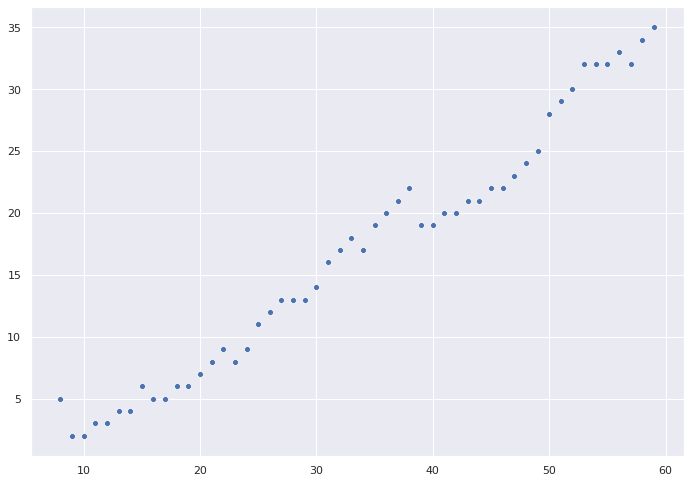

In [175]:
import seaborn as sns

archetypes_iteration = [x for x in range(8, 60)]
archetypes_iteration

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(archetypes_iteration, archetypes_len)

##Extra

In [0]:
#not used in the algorithm, but useful

#converter cards to labels
a = le.transform(['The Log', 'Ice Wizard',	'Wall Breakers',	'Tornado',	'Bomb Tower', 'Rocket', 'Goblins', 'Valkyrie', 'Miner'])
list(a)

#converter labels to cards
a = le.inverse_transform([2, 5, 40, 53, 64, 86])
list(a)